In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from numpy import median
from datetime import date

In [14]:
# Hier euren Pfad zur CSV einfügen
path = "C:/Users/lorga/Desktop/Parlament/"
meps_df = pd.read_csv(path + "data/output.csv", sep = ";")

In [15]:
meps_df.head()

,identifier,name,familyName,givenName,country,group,gender,memberships,born_place,born_day,born_month,born_year,disability,relatives,educated_at,highest_degree,occupation
0,99945,lena düpont,Düpont,Lena,DE,PPE,FEMALE,"LIBE,D-ME,AGRI,FEMM,D-JP",Dortmund,30,4,1986,NaN,NaN,NaN,university,"journalist,manager,politician"
1,204333,salvatore de meo,De Meo,Salvatore,IT,PPE,MALE,"AFCO,AGRI,D-RS,D-IN,ITRE,IMCO,D-RU",Fondi,27,10,1971,NaN,NaN,Sapienza University of Rome,university,"manager,lawyer,politician,businessperson"
2,124739,carlos zorrinho,Zorrinho,Carlos,PT,S&D,MALE,"DACP,ITRE,DAFR,DEVE,DMAS",Óbidos,28,5,1959,NaN,NaN,University of Évora,phd,"researcher,politician,official"
3,97236,marie toussaint,Toussaint,Marie,FR,Verts/ALE,FEMALE,"ITRE,JURI,D-US,DLAT,ENVI",LILLE,27,5,1987,NaN,NaN,Sciences Po,NaN,"lawyer,politician,activist"
4,124812,fabio massimo castaldo,Castaldo,Fabio Massimo,IT,Renew,MALE,"AFET,SEDE,ECON,D-CL,DSCA,DLAT,DEPA",Rome,18,9,1985,NaN,NaN,Tor Vergata University of Rome,university,"lawyer,politician"


In [4]:
group_list = list(set(meps_df["group"].tolist()))
country_list = list(set(meps_df["country"].tolist()))

In [5]:
org_list = []
for list_entry in meps_df["memberships"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            org_list.append(entry)
org_list = list(set(org_list))
org_list.remove("nan")
org_list[:5]

['AFET', 'DASE', 'D-US', 'DMED', 'AFCO']

In [6]:
committee_list = [org for org in org_list if org[0] != "D"]
committee_list[:5]

['AFET', 'AFCO', 'TRAN', 'PETI', 'ENVI']

In [7]:
occupation_list = []
for list_entry in meps_df["occupation"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            occupation_list.append(entry)
occupation_list = list(set(occupation_list))
occupation_list.remove("nan")
occupation_list[:5]

['professor', 'pediatrician', 'comedian', 'journalist', 'biologist']

In [8]:
degree_list = ["secondary", "university", "phd"]

In [9]:
educated_at_list = []
for list_entry in meps_df["educated_at"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            educated_at_list.append(entry)
educated_at_list = list(set(educated_at_list))
#for entry in educated_at_list:
#    filter_educated_at_list = educated_at_list.copy()
#    filter_educated_at_list.remove(entry)
#    for second_entry in filter_educated_at_list:
#        if entry in second_entry and entry in educated_at_list:
#            educated_at_list.remove(entry)
#educated_at_list.remove("nan")
educated_at_list[:5]

['University of Naples Federico II',
 'University of Antwerp',
 'Bordeaux Montaigne University',
 'Moscow State University',
 'Lithuanian Academy of Sciences']

## Gender

In [10]:
def filter_women_perc_df(column, column_entries, meps_df):
    gender_dict = {}
    non_na_df = meps_df.loc[meps_df[column].notna()]
    for column_entry in column_entries:
        filter_df = non_na_df.loc[non_na_df[column].str.contains(column_entry)]
        female_count = len(filter_df.loc[filter_df["gender"] == "FEMALE"].index)
        if len(filter_df.index > 0):
            female_percentage = female_count / len(filter_df.index) * 100
            gender_dict[column_entry] = female_percentage
    filter_percentage_df = pd.DataFrame.from_dict([gender_dict]).transpose()
    filter_percentage_df = filter_percentage_df.rename(columns = {0: "women_percentage"})
    return filter_percentage_df.sort_values("women_percentage")

How many MEPs are female?

In [11]:
gender_percentages_df = pd.DataFrame(meps_df.value_counts("gender"))
gender_percentages_df = gender_percentages_df.reset_index().rename(columns = {0: "count"})
gender_percentages_df["percentage"] = gender_percentages_df["count"] / gender_percentages_df["count"].sum()
gender_percentages_df.to_csv("scrolly_gender_meps.csv", index = False)
gender_percentages_df

,gender,count,percentage
0,MALE,425,0.603693
1,FEMALE,279,0.396307


How does that compare to the general population?

In [44]:
population_dict = {"FEMALE": "", "MALE": ""}
population_female_df = pd.read_csv(path + "analysis/gender_female.tsv", sep = "\t")
population_dict["FEMALE"] = int(population_female_df["2023 "][0].split(" ")[0])
population_male_df = pd.read_csv(path + "analysis/gender_male.tsv", sep = "\t")
population_dict["MALE"] = int(population_male_df["2023 "][0].split(" ")[0])
population_dict["TOTAL"] = population_dict["FEMALE"] + population_dict["MALE"]
gender_population_df = pd.DataFrame.from_dict(population_dict, orient = "index")
gender_population_df = gender_population_df.rename(columns = {0: "count"})
gender_population_df["percentage"] = gender_population_df["count"] / gender_population_df["count"]["TOTAL"]
gender_population_df.to_csv("scrolly_gender_population.csv", index = False)
gender_population_df

,count,percentage
FEMALE,229400684,0.511195
MALE,219353139,0.488805
TOTAL,448753823,1.000000


How is that split along faction lines?

In [12]:
group_women_perc_df = filter_women_perc_df("group", group_list, meps_df)
group_women_perc_df.sort_values("women_percentage")

,women_percentage
ECR,27.941176
NI,34.615385
ID,36.206897
PPE,36.931818
Renew,42.156863
S&D,42.446043
Verts/ALE,48.611111
The Left,51.351351


How is split along country lines?

In [13]:
country_women_perc_df = filter_women_perc_df("country", country_list, meps_df)
country_women_perc_df.sort_values("women_percentage")[:10]
#country_women_perc_df = country_women_perc_df.reset_index().rename(columns = {"index": "country"})
#country_women_perc_df.to_csv("gender_country.csv", index = False)

,women_percentage
RO,15.151515
CY,16.666667
GR,23.809524
LT,27.272727
SK,28.571429
EE,28.571429
BG,29.411765
CZ,33.333333
MT,33.333333
HR,33.333333


In [51]:
country_women_perc_df.sort_values("women_percentage", ascending = False)[:10]

,women_percentage
LU,66.666667
FI,57.142857
SE,52.380952
ES,50.847458
FR,48.101266
PT,47.619048
IT,46.052632
NL,44.827586
LV,42.857143
DK,42.857143


How about per committee?

In [52]:
committee_percentage_df = filter_women_perc_df("memberships", committee_list, meps_df)
committee_percentage_df.sort_values("women_percentage")
least_women_committees_df = committee_percentage_df.head(4)
least_women_committees_df

,women_percentage
AFCO,21.818182
SEDE,24.074074
BUDG,27.272727
AFET,28.758170


In [53]:
most_women_committees_df = committee_percentage_df.tail(4)
most_women_committees_df

,women_percentage
ENVI,47.337278
SANT,52.727273
EMPL,55.882353
FEMM,85.074627


In [71]:
gender_committees_df = pd.concat([least_women_committees_df, most_women_committees_df])
gender_committees_df = gender_committees_df.reset_index().rename(columns = {"index": "committee"})
gender_committees_df["men_percentage"] = 100 - gender_committees_df["women_percentage"]
gender_committees_df.to_csv("gender_committees.csv", index = False)
gender_committees_df

,committee,women_percentage,men_percentage
0,AFCO,21.818182,78.181818
1,SEDE,24.074074,75.925926
2,BUDG,27.272727,72.727273
3,AFET,28.758170,71.241830
4,ENVI,47.337278,52.662722
5,SANT,52.727273,47.272727
6,EMPL,55.882353,44.117647
7,FEMM,85.074627,14.925373


In [17]:
memberships_df = meps_df.loc[meps_df["memberships"].notna()]
memberships_df = memberships_df.loc[memberships_df["memberships"].str.contains("AFCO")]
memberships_df["gender"].value_counts()

MALE      43
FEMALE    12
Name: gender, dtype: int64

## Place of birth

Where were MEPs born?

In [18]:
#meps_df["born_region"].value_counts()

Which countries have MEPs born in other countries?

In [19]:
#origins_by_country_df = meps_df.groupby("country")["born_region"].value_counts().unstack(fill_value=0)
#origins_by_country_df = origins_by_country_df.reset_index()[["country", "native", "eu", "other"]]
#origins_by_country_df["total"] = origins_by_country_df[["native", "eu", "other"]].sum(axis = 1)
#origins_by_country_df["total"] = round(origins_by_country_df[["native", "eu", "other"]].sum(axis = 1), 2)
#origins_by_country_df["native_pc"] = round(origins_by_country_df["native"] / origins_by_country_df["total"], 2)
#origins_by_country_df["eu_pc"] = round(origins_by_country_df["eu"] / origins_by_country_df["total"], 2)
#origins_by_country_df["other_pc"] = round(origins_by_country_df["other"] / origins_by_country_df["total"], 2)
#origins_by_country_df = origins_by_country_df.sort_values(by = "native_pc", ascending = False)
#origins_by_country_df[:10]

In [20]:
#non_native_df = origins_by_country_df[["country", "eu_pc", "other_pc"]]
#non_native_df["non_native_pc"] = (non_native_df["eu_pc"] + non_native_df["other_pc"]) * 100
#non_native_df = non_native_df.drop(["eu_pc", "other_pc"], axis = 1)
#non_native_df = non_native_df.sort_values("non_native_pc", ascending = False)
#non_native_df.to_csv("non_native.csv", index = False, sep =";")
#non_native_df[:10]

Wurden diese Abgeordneten in der EU oder außerhalb geboren?

In [21]:
#origins_by_country_df.sort_values("eu_pc", ascending = False).head()

In [22]:
#origins_by_country_df.sort_values("other_pc", ascending = False).head()

Which German MEPs were not born in Germany?

In [23]:
#meps_df.loc[(meps_df["country"] == "DE") & (meps_df["born_region"] != "native")]

## Education

For how many MEPs do we have degree data?

In [24]:
len(meps_df.loc[meps_df["highest_degree"].notna()].index)

327

In [25]:
len(meps_df.loc[meps_df["educated_at"].notna()].index)

455

In [26]:
def check_education_na(meps_df, column, group):
    check_notna_df = meps_df.loc[meps_df[column].notna()]
    check_notna_df = pd.DataFrame(check_notna_df.groupby(group).size()).reset_index().rename(columns = {0: "notna"})
    check_na_df = meps_df.loc[~meps_df[column].notna()]
    check_na_df = pd.DataFrame(check_na_df.groupby(group).size()).reset_index().rename(columns = {0: "na"})
    check_notna_df = check_notna_df.merge(check_na_df, on = group)
    check_na_df["na_ratio"] = check_na_df["na"] / (check_notna_df["notna"] + check_notna_df["na"])
    check_na_df = check_na_df.sort_values("na_ratio")
    return check_na_df

Does that change along faction lines?

In [27]:
highest_degree_na_df = check_education_na(meps_df, "highest_degree", "group")
highest_degree_na_df

,group,na,na_ratio
5,S&D,63,0.453237
2,NI,24,0.461538
4,Renew,49,0.480392
3,PPE,88,0.500000
7,Verts/ALE,39,0.541667
0,ECR,46,0.676471
1,ID,41,0.706897
6,The Left,27,0.729730


In [28]:
educated_at_group_na_df = check_education_na(meps_df, "educated_at", "group")
educated_at_group_na_df

,group,na,na_ratio
4,Renew,31,0.303922
2,NI,16,0.307692
0,ECR,22,0.323529
5,S&D,47,0.338129
3,PPE,63,0.357955
7,Verts/ALE,26,0.361111
6,The Left,16,0.432432
1,ID,28,0.482759


How about country lines?

In [29]:
highest_degree_country_df = check_education_na(meps_df, "highest_degree", "country")
highest_degree_country_df

,country,na,na_ratio
6,EE,2,0.285714
22,RO,11,0.333333
16,LU,2,0.333333
12,HU,8,0.380952
4,DE,37,0.385417
0,AT,8,0.421053
17,LV,3,0.428571
7,ES,26,0.440678
8,FI,7,0.500000
24,SI,4,0.500000


In [30]:
educated_at_country_df = check_education_na(meps_df, "educated_at", "country")
educated_at_country_df

,country,na,na_ratio
11,HU,1,0.047619
22,SI,1,0.125000
5,DK,2,0.142857
12,IE,2,0.153846
16,MT,1,0.166667
10,HR,2,0.166667
14,LT,2,0.181818
18,PL,11,0.211538
23,SK,3,0.214286
2,BG,4,0.235294


What are the highest degrees that MEPs have achieved?

In [31]:
degree_count_df = pd.DataFrame(meps_df.value_counts("highest_degree"))
degree_count_df = degree_count_df.reindex(degree_list)
degree_count_df = degree_count_df.reset_index().rename(columns = {0: "count"})
degree_count_df.to_csv("degree_count.csv", index = False, sep =";")
degree_count_df

,highest_degree,count
0,secondary,10
1,university,214
2,phd,103


How many MEPs went to university?

In [32]:
mep_university_df = degree_count_df
university_yes = ["university", "phd"]
mep_university_yes_df = mep_university_df.loc[mep_university_df["highest_degree"].isin(university_yes)]
mep_university_no_df = mep_university_df.loc[~mep_university_df["highest_degree"].isin(university_yes)]
grouped_sum = mep_university_yes_df.groupby("highest_degree")["count"].sum()
new_row = pd.DataFrame({"highest_degree": ["university"], "count": [grouped_sum.sum()]})
mep_university_df = mep_university_no_df.append(new_row, ignore_index=True)
mep_university_df = mep_university_df.rename(columns = {"highest_degree": "degree"})
mep_university_df.to_csv("scrolly_degree_meps.csv", index = False, sep =";")
mep_university_df

C:\Users\lorga\AppData\Local\Temp\ipykernel_12472\4202979287.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mep_university_df = mep_university_no_df.append(new_row, ignore_index=True)


,degree,count
0,secondary,10
1,university,317


How does that compare to the general population?

In [68]:
tertiary_education_dict = {"yes": "", "no": ""}
tertiary_education_df = pd.read_csv(path + "analysis/education.tsv", sep = "\t")
tertiary_education_dict["yes"] = float(tertiary_education_df["2023 "].tolist()[0])
tertiary_education_dict["no"] = 100 - tertiary_education_dict["yes"]
tertiary_education_df = pd.DataFrame.from_dict(tertiary_education_dict, orient = "index")
tertiary_education_df = tertiary_education_df.reset_index()
tertiary_education_df = tertiary_education_df.rename(columns = {"index": "tertiary_education", 0: "percentage"})
tertiary_education_df.to_csv("scrolly_degree_population.csv", index = False, sep =";")
tertiary_education_df

,tertiary_education,percentage
0,yes,43.1
1,no,56.9


Does degree composition change along group lines?

In [33]:
overall_dict = {}
for group in set(meps_df["group"].tolist()):
    group_df = meps_df.loc[meps_df["group"] == group]
    degree_dict = {}
    for degree in degree_list:
        degree_dict[degree] = 0
    notna_df = group_df.loc[group_df["highest_degree"].notna()]["highest_degree"]
    for entry in notna_df.tolist():
        for degree in degree_list:
            if degree in entry:
                degree_dict[degree] += 1
    overall_dict[group] = degree_dict
group_degree_df = pd.DataFrame.from_dict(overall_dict, orient = "index")
group_degree_df["total"] = group_degree_df.sum(axis = 1)
for column in group_degree_df.columns:
    group_degree_df[column] = round(group_degree_df[column] / group_degree_df["total"] * 100, 2)
group_degree_df = group_degree_df.drop(columns = "total")
group_degree_df

,secondary,university,phd
NI,3.57,53.57,42.86
Renew,1.89,79.25,18.87
ECR,4.55,59.09,36.36
PPE,2.27,65.91,31.82
Verts/ALE,6.06,72.73,21.21
S&D,2.63,57.89,39.47
The Left,0.00,70.00,30.00
ID,5.88,64.71,29.41


Where were MEPs educated?

In [34]:
notna_df = meps_df.loc[meps_df["educated_at"].notna()]["educated_at"]
educated_at_df = notna_df.value_counts("educated_at")
educated_at_dict = {}
for entry in notna_df.tolist():
    for university in entry.split(","):
        if university not in educated_at_dict.keys():
            educated_at_dict[university] = 1
        else:
            educated_at_dict[university] += 1
educated_at_df = pd.DataFrame.from_dict(educated_at_dict, orient = "index")
educated_at_df = educated_at_df.rename(columns = {0: "count"})
educated_at_df = educated_at_df.drop(index = "Faculty of Law and Administration")
educated_at_df = educated_at_df.sort_values("count", ascending = False)
educated_at_df = educated_at_df.reset_index().rename(columns = {"index": "university"})
educated_at_df = educated_at_df[:10]
educated_at_df.to_csv("educated_at.csv", index = False, sep =";")
educated_at_df

,university,count
0,Sciences Po,14
1,Eötvös Loránd University,11
2,University of Vienna,8
3,University of Bologna,7
4,National and Kapodistrian University of Athens,7
5,University of Tartu,7
6,Sapienza University of Rome,7
7,Complutense University of Madrid,7
8,University of Latvia,6
9,Bocconi University,6


In which countries are MEPs likely to have gone to the same universities?

In [35]:
def get_top_uni_pc(column, entry):
    filter_df = meps_df.loc[meps_df[column] == entry]
    educated_at_dict = {}
    for educated_at in educated_at_list:
        educated_at_dict[educated_at] = 0
    notna_df = filter_df.loc[filter_df["educated_at"].notna()]["educated_at"]
    for entry in notna_df.tolist():
        for educated_at in educated_at_list:
            if educated_at in entry:
                educated_at_dict[educated_at] += 1
    educated_at_df = pd.DataFrame.from_dict(educated_at_dict, orient = "index")
    educated_at_df = educated_at_df.reset_index().rename(columns = {"index": "university", 0: "count"})
    educated_at_df = educated_at_df.sort_values(by = "count", ascending = False)
    mep_count = len(notna_df.index)
    total_mep_count = len(filter_df.index)
    top_uni = educated_at_df["university"].values[0]
    top_uni_count = educated_at_df["count"].values[0]
    top_uni_pc = round(top_uni_count / mep_count * 100, 2)
    return top_uni, top_uni_pc, top_uni_count, mep_count, total_mep_count

In [36]:
country_uni_dict = {}
for country in country_list:
    country_uni_dict[country] = get_top_uni_pc("country", country)
country_uni_df = pd.DataFrame.from_dict(country_uni_dict, orient = "index")
country_uni_df = country_uni_df.rename(columns = {0: "university", 1: "percentage", 2: "meps", 3: "meps_with_data", 4: "total_meps"})
country_uni_df = country_uni_df.sort_values("percentage", ascending = False)
country_uni_df

,university,percentage,meps,meps_with_data,total_meps
CY,National and Kapodistrian University of Athens,100.00,2,2,6
EE,University of Tartu,100.00,7,7,7
LV,University of Latvia,85.71,6,7,7
SI,University of Ljubljana,71.43,5,7,8
HR,University of Zagreb,70.00,7,10,12
LT,Vilnius University,66.67,6,9,11
MT,University of Malta,60.00,3,5,6
HU,Eötvös Loránd University,55.00,11,20,21
AT,Vienna,50.00,7,14,19
SE,Stockholm University,50.00,3,6,21


What about groups?

In [37]:
group_uni_dict = {}
for group in group_list:
    group_uni_dict[group] = get_top_uni_pc("group", group)
group_uni_df = pd.DataFrame.from_dict(group_uni_dict, orient = "index")
group_uni_df = group_uni_df.rename(columns = {0: "university", 1: "percentage", 2: "meps", 3: "meps_with_data", 4: "total_meps"})
group_uni_df = group_uni_df.sort_values("percentage", ascending = False)
group_uni_df

,university,percentage,meps,meps_with_data,total_meps
NI,Eötvös Loránd University,16.67,6,36,52
The Left,National and Kapodistrian University of Athens,14.29,3,21,37
ECR,University of Warsaw,8.70,4,46,68
Verts/ALE,Free University Berlin,8.70,4,46,72
ID,University of Bologna,6.67,2,30,58
Renew,Sciences Po,5.63,4,71,102
S&D,University of Bologna,4.35,4,92,139
PPE,Faculty of Law,3.54,4,113,176


## Occupations

How about occupation data?

In [165]:
len(meps_df.loc[meps_df["occupation"].notna()].index)

653

What are the most common occupations?

In [166]:
occupation_dict = {}
for occupation in occupation_list:
    occupation_dict[occupation] = 0
notna_df = meps_df.loc[meps_df["occupation"].notna()]["occupation"]
for entry in notna_df.tolist():
    for occupation in occupation_list:
        if occupation in entry:
            occupation_dict[occupation] += 1
occupation_count_df = pd.DataFrame.from_dict(occupation_dict, orient = "index")
occupation_count_df = occupation_count_df.rename(columns = {0: "count"})
occupation_count_df = occupation_count_df.sort_values("count", ascending = False)
occupation_count_df["percentage"] = round(occupation_count_df["count"] / len(notna_df.index), 3) * 100
occupation_count_df = occupation_count_df.drop(columns = "count", index = "politician")
occupation_count_df = occupation_count_df.reset_index().rename(columns = {"index": "occupation"})
occupation_count_df = occupation_count_df[:10]
occupation_count_df.to_csv("occupation_count.csv", index = False, sep =";")
occupation_count_df

,occupation,percentage
0,manager,24.3
1,lawyer,18.5
2,researcher,17.6
3,official,13.0
4,teacher,13.0
5,journalist,11.3
6,consultant,4.7
7,engineer,3.7
8,diplomat,3.7
9,doctor,3.4


Does occupation composition change along group lines?

In [167]:
overall_dict = {}
for group in set(meps_df["group"].tolist()):
    group_df = meps_df.loc[meps_df["group"] == group]
    occupation_dict = {}
    for occupation in occupation_list:
        occupation_dict[occupation] = 0
    notna_df = group_df.loc[group_df["occupation"].notna()]["occupation"]
    for entry in notna_df.tolist():
        for occupation in occupation_list:
            if occupation in entry:
                occupation_dict[occupation] += 1 #XXXX
    overall_dict[group] = occupation_dict
group_occupation_df = pd.DataFrame.from_dict(overall_dict, orient = "index")
group_occupation_df["total"] = group_occupation_df.sum(axis = 1)
for column in group_occupation_df.columns:
    group_occupation_df[column] = round(group_occupation_df[column] / group_occupation_df["total"] * 100, 2)
group_occupation_df = group_occupation_df.drop(columns = "total")
group_occupation_df

,q2827803,french environment and energy management agency,conspiracy theorist,essayist,poet,cook,doctor,musician,horn player,designer,...,entrepreneur,slavist,labourer,trade unionist,translator,caricaturist,pianist,singer,bank officer,jazz musician
PPE,0.00,0.00,0.00,0.26,0.26,0.00,1.05,0.26,0.00,0.26,...,0.26,0.26,0.00,0.52,0.00,0.00,0.00,0.00,0.26,0.00
S&D,0.00,0.00,0.00,0.00,0.00,0.00,2.04,0.00,0.00,0.00,...,0.00,0.00,0.00,1.17,0.58,0.29,0.00,0.00,0.00,0.00
Renew,0.00,0.00,0.00,0.00,0.00,0.00,1.63,0.00,0.41,0.00,...,0.41,0.00,0.00,0.41,0.00,0.00,0.00,0.41,0.00,0.00
ECR,0.00,0.00,0.00,0.00,0.00,0.00,1.67,0.00,0.00,0.00,...,0.00,0.00,0.00,0.83,0.00,0.00,0.00,0.00,0.00,0.00
The Left,1.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,2.90,0.00,0.00,0.00,0.00,0.00,0.00
NI,0.00,0.00,0.76,0.00,0.00,0.00,1.52,0.00,0.00,0.00,...,0.00,0.00,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ID,0.00,0.00,0.00,0.00,0.00,0.00,1.82,0.00,0.00,0.00,...,0.00,0.00,0.00,0.91,0.00,0.00,0.00,0.00,0.00,0.00
Verts/ALE,0.00,0.68,0.00,0.00,0.00,0.68,0.68,0.68,0.00,0.00,...,0.68,0.00,0.00,0.00,0.68,0.00,0.68,0.00,0.00,0.68


Is there a "lawyers' party"?

In [168]:
group_occupation_df["lawyer"].sort_values(ascending = False)

ID           14.55
PPE           9.69
NI            9.09
S&D           8.45
Renew         6.94
Verts/ALE     4.05
ECR           2.50
The Left      1.45
Name: lawyer, dtype: float64

Is there a "farmers' party"?

In [169]:
group_occupation_df["farmer"].sort_values(ascending = False)

Renew        2.45
Verts/ALE    1.35
PPE          1.05
NI           0.76
S&D          0.58
ECR          0.00
The Left     0.00
ID           0.00
Name: farmer, dtype: float64

Hoes does occupation by sector compare to the general population?

In [170]:
employment_sector_df = pd.read_csv("C:/Users/lorga/Desktop/Parlament/analysis/employment_by_sector_reference.csv")
employment_sector_df = employment_sector_df.loc[employment_sector_df["geo"] == "EU27_2020"]
employment_sector_df = employment_sector_df[["nace_r2", "OBS_VALUE"]]
employment_sector_df["nace_r2"] = employment_sector_df["nace_r2"].replace({
    "A": "agriculture", 
    "B-E": "industry (except construction)",
    "C": "manufacturing",
    "F": "construction",
    "G-I": "wholesale and retail trading",
    "J": "communication",
    "K": "financial",
    "L": "real estate",
    "M_N": "research & administration",
    "O-Q": "public service",
    "R-U": "arts & entertainment",
    "TOTAL": "total"
})
employment_sector_df = employment_sector_df.transpose()
employment_sector_df.columns = employment_sector_df.iloc[0]
employment_sector_df = employment_sector_df[1:]
employment_sector_df

nace_r2,agriculture,industry (except construction),manufacturing,construction,wholesale and retail trading,communication,financial,real estate,research & administration,public service,arts & entertainment,total
OBS_VALUE,4.1,15.4,13.9,6.7,24.2,3.3,2.3,1.1,12.9,24.1,5.9,100.0


## Age

In [105]:
len(meps_df.loc[meps_df["born_year"].notna()].index)

704

In [137]:
date.today()

datetime.date(2024, 5, 10)

In [138]:
def calculate_age(born_year, born_month, born_day):
    #today = date.today()
    today = date(2024, 5, 6)
    if born_month < today.month:
        return today.year - born_year
    elif born_month == today.month:
        if born_day <= today.day:
            return today.year - born_year
        return today.year - born_year - 1
    return today.year - born_year - 1   

How are MEPs' ages distributed?

In [139]:
meps_ages_df = meps_df[["born_year", "born_month", "born_day"]].copy()
meps_ages_df["age"] = meps_ages_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
meps_ages_df.head()

,born_year,born_month,born_day,age
0,1986,4,30,38
1,1971,10,27,52
2,1959,5,28,64
3,1987,5,27,36
4,1985,9,18,38


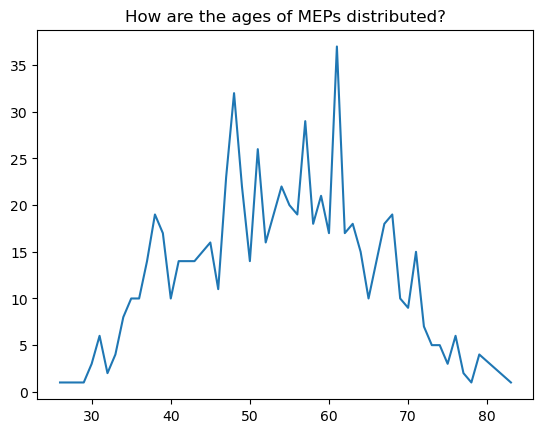

In [108]:
meps_age_groups_df = meps_ages_df
meps_age_groups_df = meps_age_groups_df.groupby("age").size()
meps_age_groups_df = pd.DataFrame(meps_age_groups_df).reset_index().rename(columns = {0: "count"})
plt.plot(meps_age_groups_df["age"], meps_age_groups_df['count'])
plt.title("How are the ages of MEPs distributed?")
plt.show()

How do MEPs' ages divide into buckets?

In [116]:
meps_ages_df['age_buckets'] = pd.cut(meps_ages_df['age'], 
                                      bins = [0, 31, 51, 71, 100], 
                                      labels=['0-30', '31-50', '51-70', '71-100'])
meps_ages_df['age_buckets']
grouped_sum = meps_ages_df.groupby('age_buckets').size()
age_buckets_df = pd.DataFrame(grouped_sum).reset_index().rename(columns = {0: "count"})
age_buckets_df["percentage"] = age_buckets_df["count"] / age_buckets_df["count"].sum()
age_buckets_df.to_csv("scrolly_age_meps.csv", index = False)
age_buckets_df

,age_buckets,count,percentage
0,0-30,12,0.017045
1,31-50,295,0.419034
2,51-70,363,0.515625
3,71-100,34,0.048295


How does that compare to the general population?

In [117]:
population_ages_df = pd.read_csv(path + "analysis/age.tsv", sep = "\t")
population_ages_df = population_ages_df.rename(columns = {"freq,unit,age,sex,geo\TIME_PERIOD": "age", "2023 ": "count"})
population_ages_df["count"] = population_ages_df["count"].str.slice(stop = -4).astype(int)
population_ages_df = population_ages_df.loc[~(population_ages_df["age"].str.contains("TOTAL") | (population_ages_df["age"].str.contains("Y_OPEN")))]
population_ages_df["age"] = population_ages_df["age"].str.split(",").str.get(2).str.slice(1)
population_ages_df = population_ages_df.replace({"_LT1": 0})
population_ages_df["age"] = population_ages_df["age"].astype(int)
population_ages_df = population_ages_df.sort_values("age")
population_ages_df['age_buckets'] = pd.cut(population_ages_df['age'], 
                                      bins = [0, 31, 51, 71, 100], 
                                      labels=['0-30', '31-50', '51-70', '71-100'])
grouped_sum = population_ages_df.groupby('age_buckets').sum()
population_ages_df = pd.DataFrame(grouped_sum).reset_index().rename(columns = {0: "count"}).drop(columns = {"age"})
population_ages_df["percentage"] = population_ages_df["count"] / population_ages_df["count"].sum()
population_ages_df.to_csv("scrolly_age_population.csv", index = False, sep =";")
population_ages_df

,age_buckets,count,percentage
0,0-30,146653471,0.329705
1,31-50,121224110,0.272535
2,51-70,118060890,0.265423
3,71-100,58864190,0.132338


What's the Parliament's median age?

In [118]:
meps_ages_df = meps_ages_df.loc[meps_ages_df["born_year"].notna()]
ages = meps_ages_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
ages = sorted(ages)
median(ages)

54.0

How do committees vary in median age?

In [119]:
def get_median_age(column, filter_list, meps_df):
    df = meps_df.loc[meps_df[column].notna()]
    df = df.loc[meps_df["born_year"] != 0]
    df = df.loc[meps_df["born_year"].notna()]
    median_age_dict = {}
    for filter_entry in filter_list:
        filter_df = df.loc[df[column].str.contains(filter_entry)]
        ages = filter_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
        ages = sorted(ages)
        median_age_dict[filter_entry] = median(ages)
    median_age_df = pd.DataFrame.from_dict(median_age_dict, orient = "index")
    median_age_df = median_age_df.reset_index().rename(columns = {"index": "org", 0: "median_age"})
    median_age_df = median_age_df.sort_values("median_age")
    return median_age_df

In [120]:
committee_median_age_df = get_median_age("memberships", committee_list, meps_df)
committee_median_age_df = committee_median_age_df.rename(columns = {"org": "committee"})
committee_median_age_df = committee_median_age_df.sort_values("median_age")
youngest_committees = committee_median_age_df.head(4)
oldest_committees = committee_median_age_df.tail(4)
age_committees_df = pd.concat([youngest_committees, oldest_committees])
age_committees_df = age_committees_df
age_committees_df.to_csv("age_committees.csv", index = False)
age_committees_df

,committee,median_age
11,LIBE,49.0
10,SANT,50.0
19,IMCO,50.5
3,PETI,50.5
14,FISC,55.0
7,INTA,56.0
5,SEDE,56.5
1,AFCO,59.0


In [105]:
org_median_age_df = get_median_age("memberships", org_list, meps_df)
org_median_age_df[:10]

,org,median_age
27,D-IQ,48.0
51,D-ME,49.0
10,LIBE,49.0
17,DCAR,50.0
9,D-RS,50.0
71,SANT,50.0
1,D-AL,50.0
8,PETI,50.5
50,D-CA,50.5
4,D-IN,51.0


In [106]:
org_median_age_df.sort_values("median_age", ascending = False)[:10]

,org,median_age
35,DNAT,60.0
2,DPAC,60.0
56,D-BY,60.0
21,AFCO,59.0
58,DEVE,59.0
42,D-IL,58.5
15,DPAP,58.0
29,DCAS,57.5
37,DSCA,57.5
18,DAFR,57.0


In [107]:
group_median_age_df = get_median_age("group", group_list, meps_df)
group_median_age_df = group_median_age_df.rename(columns = {"org": "group"})
group_median_age_df.sort_values("median_age")

,group,median_age
7,Verts/ALE,48.0
4,The Left,50.0
2,Renew,52.0
5,NI,53.0
0,PPE,55.0
1,S&D,55.0
6,ID,57.0
3,ECR,58.0


Does median age differ from country to country?

In [108]:
country_median_age_df = get_median_age("country", country_list, meps_df)
country_median_age_df = country_median_age_df.rename(columns = {"org": "country"})
country_median_age_df.head()

,country,median_age
8,MT,43.5
14,PT,47.0
19,CZ,48.0
18,HU,49.0
24,NL,50.0


Are differences in faction median age consistent across countries?

In [136]:
country_group_age_df = meps_df.copy()
country_group_age_df["age"] = country_group_age_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
country_group_age_df = country_group_age_df.groupby(["country", "group"]).median()
country_group_age_df = country_group_age_df.reset_index()
country_group_age_df = pd.pivot_table(country_group_age_df, values = "age", index = "country", columns = "group")
country_group_age_df.columns = ["The Left", "Verts/ALE", "S&D", "Renew", "EPP", "ECR", "ID", "NI"]
country_group_age_df

C:\Users\lorga\AppData\Local\Temp\ipykernel_79604\3271425414.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_group_age_df = country_group_age_df.groupby(["country", "group"]).median()


,The Left,Verts/ALE,S&D,Renew,EPP,ECR,ID,NI
country,,,,,,,,
AT,NaN,57.0,NaN,44.0,35.0,55.0,NaN,54.0
BE,68.0,65.0,61.0,48.5,61.5,55.5,43.0,42.0
BG,54.0,NaN,59.0,52.0,42.0,47.5,NaN,NaN
CY,NaN,NaN,NaN,51.0,NaN,59.0,62.5,NaN
CZ,61.5,71.0,68.0,48.0,44.0,55.0,43.0,37.0
DE,58.0,58.0,58.0,52.5,46.0,59.0,67.0,47.0
DK,NaN,36.0,NaN,56.0,56.5,53.0,41.0,52.5
EE,NaN,33.0,NaN,57.0,57.0,55.5,NaN,NaN
ES,57.0,NaN,61.0,63.0,54.0,48.0,43.5,49.0


How does that compare to countries' median ages?

In [109]:
ages_df = pd.read_csv(path, + "analysis/ages.csv")
ages_df = ages_df.rename(columns = {" years": "country_median"})
ages_df = ages_df[["slug", "country_median"]]
ages_df.head()

,slug,country_median
0,monaco,56.2
1,italy,48.1
2,andorra,48.1
3,germany,46.7
4,spain,46.3


In [110]:
median_age_difference_df = country_median_age_df
def get_country_code(slug):
    code_dict = {
        "MT": "malta",
        "NL": "netherlands",
        "CZ": "czechia",
        "HU": "hungary",
        "PT": "portugal",
        "SE": "sweden",
        "BG": "bulgaria",
        "HR": "croatia",
        "DE": "germany",
        "ES": "spain",
        "RO": "romania",
        "AT": "austria",
        "BE": "belgium",
        "IT": "italy",
        "SK": "slovakia",
        "FR": "france",
        "DK": "denmark",
        "IE": "ireland",
        "EE": "estonia",
        "GR": "greece",
        "SI": "slovenia",
        "CY": "cyprus",
        "LU": "luxembourg",
        "PL": "poland",
        "FI": "finland",
        "LV": "latvia",
        "LT": "lithuania"
    }
    return code_dict[slug]
median_age_difference_df["slug"] = median_age_difference_df["country"].apply(get_country_code)
median_age_difference_df = median_age_difference_df.rename(columns = {"median_age": "mep_median"})
median_age_difference_df = median_age_difference_df.merge(ages_df, on = "slug", how = "left")
median_age_difference_df = median_age_difference_df.drop(["country"], axis = 1)
median_age_difference_df = median_age_difference_df.rename(columns = {"slug": "country"})
median_age_difference_df["country_median"] = round(median_age_difference_df["country_median"], 0).astype(int)
median_age_difference_df["difference"] = median_age_difference_df["mep_median"] - median_age_difference_df["country_median"]
median_age_difference_df = median_age_difference_df.sort_values("country_median", ascending = False)
median_age_difference_df.to_csv("median_age_difference.csv", index = False, sep =";")
median_age_difference_df

,mep_median,country,country_median,difference
12,53.5,italy,48,5.5
10,53.5,germany,47,6.5
18,57.0,slovenia,46,11.0
20,58.0,greece,46,12.0
8,53.0,spain,46,7.0
1,47.0,portugal,46,1.0
26,65.0,lithuania,45,20.0
25,65.0,latvia,45,20.0
7,52.0,bulgaria,45,7.0
9,53.0,romania,45,8.0
